In [1]:
import math
import itertools
import numpy as np 				# pip install numpy
import matplotlib.pyplot as plt # pip install matplotlib
import scipy as sp 				# pip install scipy
from scipy import stats 		# Used to generate gamma pdf array

# Settings for matplotlib figure size and font
plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["font.family"] = "CMU Serif"
plt.rcParams['figure.dpi'] = 140

In [ ]:
########################################################################################################################
# Simulation 1
# Comparison of the graph of Gamma(alpha_+beta_, lambda_) and the histogram of a X+Y of X~Gamma(alpha_, lambda_) and
# Y~Gamma(beta_, lambda_) random variables
########################################################################################################################
def histogram_gamma_sum(alpha_=1, beta_=3, lambda_=3):
	# x and y are vectors of 1000000 i.i.d. Gamma(alpha_,lambda_) r.v.
	x = np.random.gamma(alpha_, 1/lambda_, 1000000)
	y = np.random.gamma(beta_, 1/lambda_, 1000000)
	# r.v. of interest
	u = x + y
	# produces histogram
	plt.title(fr"(X+Y) where X$\sim$Gamma({alpha_}, {lambda_}) and Y$\sim$Gamma({beta_}, {lambda_})", fontsize=20)
	plt.xlabel("T", fontsize=16)
	plt.ylabel("Density", fontsize=16)
	plt.hist(u, bins=10000, density=True, color="darkblue")
	plt.annotate("(X+Y)", xy=(3, 0.6), size=14, ha="center", va="center", color="darkblue")
	plt.ylim([0, 0.8])
	plt.xlim([0, 5])
	# prints histogram
	plt.show()


def gamma(alpha_=1, beta_=3, lambda_=3):
	x = np.linspace(0, 60, 1000000)
	y = sp.stats.gamma.pdf(x, (alpha_+beta_), scale=1/lambda_)

	plt.title("Probability Density Function of Gamma Distribution", fontsize=20)
	plt.xlabel("T", fontsize=16)
	plt.ylabel("Density", fontsize=16)
	plt.plot(x, y, linewidth=3, color="firebrick")
	plt.annotate(f"Gamma({alpha_}+{beta_}, {lambda_})", xy=(3, 0.6), size=14, ha="center", va="center", color="firebrick")
	plt.ylim([0, 0.8])
	plt.xlim([0, 5])
	plt.show()

histogram_gamma_sum(1, 3, 3)
gamma(1, 3, 3)

In [ ]:
########################################################################################################################
# Simulation 2
# Comparison of the graph of beta(alpha_, beta_) and the histogram of a X/(X+Y) of X~Gamma(alpha_, lambda_) and
# Y~Gamma(beta_, lambda_) random variables
########################################################################################################################

def histogram_beta(alpha_=2, beta_=5, lambda_=1):
	# x and y are vectors of 1000000 i.i.d. Gamma(alpha_,lambda_) r.v.
	x = np.random.gamma(alpha_, 1/lambda_, 1000000)
	y = np.random.gamma(beta_, 1/lambda_, 1000000)
	# r.v. of interest
	v = x/(x + y)
	# produces histogram
	plt.title(fr"X/(X+Y) where X$\sim$Gamma({alpha_}, {lambda_}) and Y$\sim$Gamma({beta_}, {lambda_})", fontsize=20)
	plt.xlabel("T", fontsize=16)
	plt.ylabel("Density", fontsize=16)
	plt.hist(v, bins=10000, density=True, color="darkblue")
	plt.annotate(r"$\dfrac{X}{X+Y}$", xy=(0.6, 2.7), size=14, ha="center", va="center", color="darkblue")
	plt.ylim([0, 3])
	plt.xlim([0, 1])
	# prints histogram
	plt.show()


def beta(alpha_=2, beta_=5):
	x = np.linspace(0, 1, 10000)
	y = sp.stats.beta.pdf(x, alpha_, beta_)

	plt.title("Probability Density Function of Beta Distribution", fontsize=20)
	plt.xlabel("T", fontsize=16)
	plt.ylabel("Density", fontsize=16)
	plt.plot(x, y, linewidth=3, color="firebrick")
	plt.annotate(f"Beta({alpha_}, {beta_})", xy=(0.6, 2.7), size=14, ha="center", va="center", color="firebrick")
	plt.ylim([0, 3])
	plt.xlim([0, 1])
	plt.show()


histogram_beta(2, 5, 1)
beta(2, 5)

In [ ]:
########################################################################################################################
# Probability Density Function of Gamma Distribution
########################################################################################################################

def gamma_distribution_pdf(alpha_=4, lambda_=3):
	# Array with values from 0 to 25 with 10000 equal increments
	x = np.linspace(0, 25, 10000)

	# f(x) for X ~ Gamma(alpha_,lambda_)
	fx = (((1/lambda_)**alpha_)/math.gamma(alpha_)) * (x**(1/lambda_)) * np.exp(-(1/lambda_)*x)

	# Generating graph using matplotlib
	plt.title("Probability Density Function of Gamma Distribution", fontsize=20)
	plt.annotate(f"Gamma({alpha_}, {lambda_})", xy=(15, 0.0012), size=14, ha="center", va="center", color="firebrick")
	plt.xlabel("T", fontsize=16)
	plt.ylabel("Density", fontsize=16)
	plt.plot(x, fx, linewidth=3, color="firebrick")
	plt.xlim([0, 25])
	plt.ylim([0, 0.0015])
	plt.show()

########################################################################################################################
# Cumulative Distribution Function of Gamma Distribution
########################################################################################################################

def gamma_distribution_cdf(alpha_=4, lambda_=3):
	# Array with values from 0 to 25 with 10000 equal increments
	x = np.linspace(0, 25, 10000)

	# f(x) for X ~ Gamma(alpha_,lambda_)
	fx = (((1/lambda_)**alpha_)/math.gamma(alpha_)) * (x**(1/lambda_)) * np.exp(-(1/lambda_)*x)

	dx = 0.0025  # Same as gap between values in array x
	fxdx = fx * dx
	Fx = np.array(list(itertools.accumulate(fxdx)))

	# Generating graph using matplotlib
	plt.title("Cumulative Distribution Function of Gamma Distribution", fontsize=20)
	plt.annotate(f"Gamma({alpha_}, {lambda_})", xy=(15, 0.006), size=14, ha="center", va="center", color="firebrick")
	plt.xlabel("T", fontsize=16)
	plt.ylabel("Probability", fontsize=16)
	plt.plot(x, Fx, linewidth=3, color="firebrick")
	plt.xlim([0, 25])
	plt.ylim([0, 0.0085])
	plt.show()


gamma_distribution_pdf(4, 3)
gamma_distribution_cdf(4, 3)

In [ ]:
########################################################################################################################
# Central Limit Theorem Graph
########################################################################################################################

def central_limit_theorem(alpha_=60, lambda_=1, expected_=60, variance_=60):
	x = np.linspace(30, 90, 100000)
	y1 = sp.stats.gamma.pdf(x, alpha_, scale=1/lambda_) 		# PDF of Gamma(alpha_, lambda_)
	y2 = sp.stats.norm.pdf(x, expected_, math.sqrt(variance_)) 	# PDF of N(expected_, variance_)

    # Generating graph using matplotlib
	plt.title("Central Limit Theorem", fontsize=20)
	plt.xlabel("T", fontsize=16)
	plt.ylabel("Density", fontsize=16)
	plt.plot(x, y1, label=f"Gamma({alpha_}, {lambda_})", linewidth=3, color="firebrick")
	plt.plot(x, y2, label=f"N{expected_, variance_}", linewidth=3, color="orange")
	plt.legend(bbox_to_anchor=(1, 1), loc="upper right", borderaxespad=1, fontsize=12)
	plt.xlim([30, 90])
	plt.show()

central_limit_theorem(60, 1, 60, 60)

In [ ]:
def pdf(alpha_1=1, lambda_1=0.3, alpha_2=5, lambda_2=3, alpha_3=0.5, lambda_3=1):
	x = np.linspace(0, 10, 100000)
	y1 = sp.stats.gamma.pdf(x, alpha_1, scale=1/lambda_1) 		# PDF of Gamma(alpha_, lambda_)
	y2 = sp.stats.gamma.pdf(x, alpha_2, scale=1/lambda_2) 		# PDF of Gamma(alpha_, lambda_)
	y3 = sp.stats.gamma.pdf(x, alpha_3, scale=1/lambda_3) 		# PDF of Gamma(alpha_, lambda_)

    # Generating graph using matplotlib
	plt.title("Probability Density Function", fontsize=20)
	plt.xlabel("T", fontsize=16)
	plt.ylabel("Density", fontsize=16)
	plt.plot(x, y1, label=f"Gamma({alpha_1}, {lambda_1})", linewidth=3, color="firebrick")
	plt.plot(x, y2, label=f"Gamma({alpha_2}, {lambda_2})", linewidth=3, color="orange")
	plt.plot(x, y3, label=f"Gamma({alpha_3}, {lambda_3})", linewidth=3, color="purple")
	plt.legend(bbox_to_anchor=(1, 1), loc="upper right", borderaxespad=1, fontsize=12)
	plt.ylim([0, 0.6])
	plt.xlim([0, 10])
	plt.show()

pdf()

In [ ]:
def chi2_pdf(k1=1, k2=2 ,k3=3, k4=4, k6=6, k9=9):
	x = np.linspace(0, 10, 100000)
	y1 = sp.stats.chi2.pdf(x, k1)
	y2 = sp.stats.chi2.pdf(x, k2)
	y3 = sp.stats.chi2.pdf(x, k3)
	y4 = sp.stats.chi2.pdf(x, k4)
	y6 = sp.stats.chi2.pdf(x, k6)
	y9 = sp.stats.chi2.pdf(x, k9)


    # Generating graph using matplotlib
	plt.title(r"Probability Density Function of $\chi^2_n$", fontsize=20)
	plt.xlabel("T", fontsize=16)
	plt.ylabel("Density", fontsize=16)
	plt.plot(x, y1, label=f"n={k1}", linewidth=3, color="blue")
	plt.plot(x, y2, label=f"n={k2}", linewidth=3, color="turquoise")
	plt.plot(x, y3, label=f"n={k3}", linewidth=3, color="lime")
	plt.plot(x, y4, label=f"n={k4}", linewidth=3, color="lightgreen")
	plt.plot(x, y6, label=f"n={k6}", linewidth=3, color="green")
	plt.plot(x, y9, label=f"n={k9}", linewidth=3, color="darkgreen")
	plt.legend(bbox_to_anchor=(1, 1), loc="upper right", borderaxespad=1, fontsize=12)
	plt.ylim([0, 0.6])
	plt.xlim([0, 10])
	plt.show()

chi2_pdf()

In [ ]:
def beta_pdf(_alpha_1=2, _beta_1=8 , _alpha_2=5,_beta_2=5, _alpha_3=8, _beta_3=2):
	x = np.linspace(0, 10, 100000)
	y1 = sp.stats.beta.pdf(x, _alpha_1, _beta_1)
	y2 = sp.stats.beta.pdf(x, _alpha_2, _beta_2)
	y3 = sp.stats.beta.pdf(x, _alpha_3, _beta_3)

    # Generating graph using matplotlib
	plt.title(r"Probability Density Function of Beta$(\alpha, \beta)$", fontsize=20)
	plt.xlabel("T", fontsize=16)
	plt.ylabel("Density", fontsize=16)
	plt.plot(x, y1, label=fr"$\alpha=${_alpha_1}, $\beta=${_beta_1}", linewidth=3, color="blue")
	plt.plot(x, y2, label=fr"$\alpha=${_alpha_1}, $\beta=${_beta_2}", linewidth=3, color="turquoise")
	plt.plot(x, y3, label=fr"$\alpha=${_alpha_1}, $\beta=${_beta_3}", linewidth=3, color="lime")
	plt.legend(bbox_to_anchor=(1, 1), loc="upper right", borderaxespad=1, fontsize=12)
	plt.ylim([0, 4])
	plt.xlim([0, 1])
	plt.show()

beta_pdf()

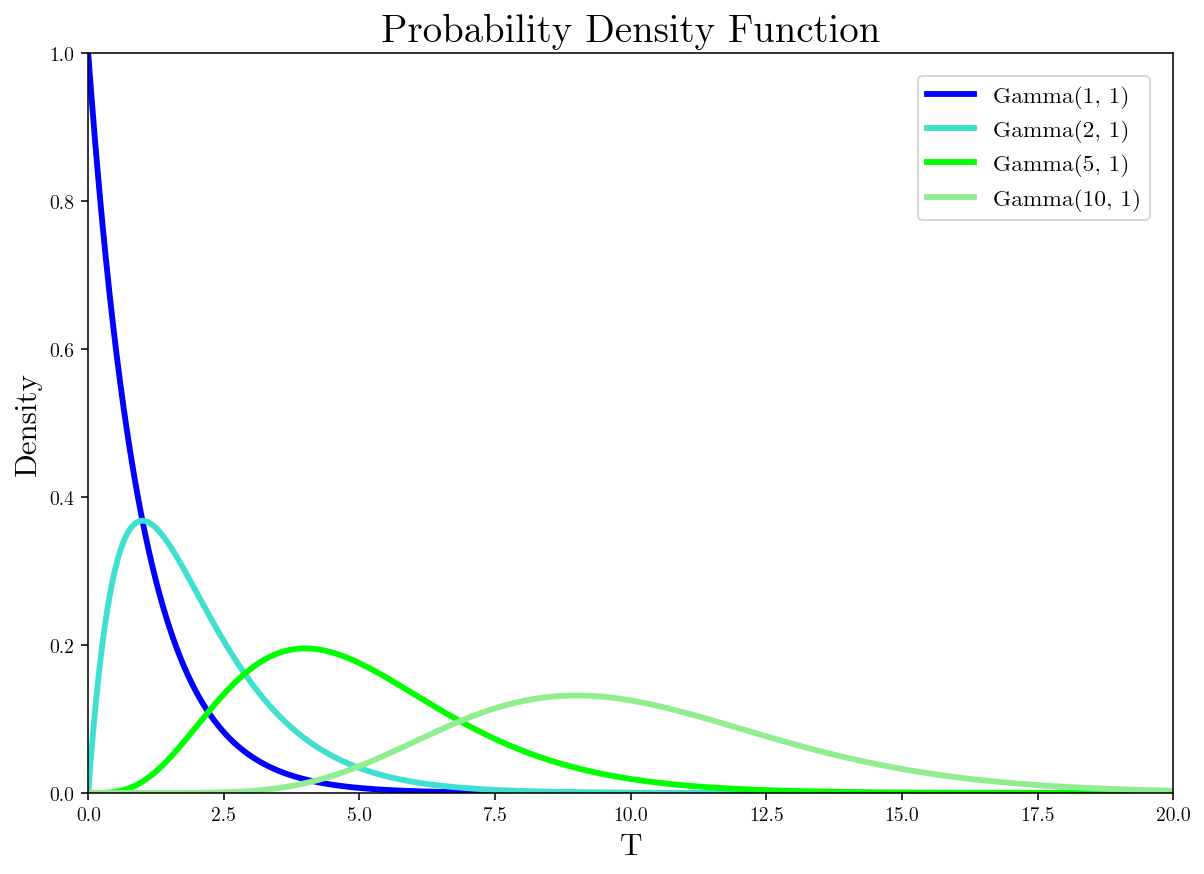

In [8]:
def pdf(alpha_1=1, lambda_1=1, alpha_2=2, lambda_2=1, alpha_3=5, lambda_3=1, alpha_4=10, lambda_4=1):
	x = np.linspace(0, 20, 100000)
	y1 = sp.stats.gamma.pdf(x, alpha_1, scale=1/lambda_1) 		# PDF of Gamma(alpha_, lambda_)
	y2 = sp.stats.gamma.pdf(x, alpha_2, scale=1/lambda_2) 		# PDF of Gamma(alpha_, lambda_)
	y3 = sp.stats.gamma.pdf(x, alpha_3, scale=1/lambda_3) 		# PDF of Gamma(alpha_, lambda_)
	y4 = sp.stats.gamma.pdf(x, alpha_4, scale=1/lambda_4) 		# PDF of Gamma(alpha_, lambda_)

    # Generating graph using matplotlib
	plt.title("Probability Density Function", fontsize=20)
	plt.xlabel("T", fontsize=16)
	plt.ylabel("Density", fontsize=16)
	plt.plot(x, y1, label=f"Gamma({alpha_1}, {lambda_1})", linewidth=3, color="blue")
	plt.plot(x, y2, label=f"Gamma({alpha_2}, {lambda_2})", linewidth=3, color="turquoise")
	plt.plot(x, y3, label=f"Gamma({alpha_3}, {lambda_3})", linewidth=3, color="lime")
	plt.plot(x, y4, label=f"Gamma({alpha_4}, {lambda_4})", linewidth=3, color="lightgreen")
	plt.legend(bbox_to_anchor=(1, 1), loc="upper right", borderaxespad=1, fontsize=12)
	plt.ylim([0, 1])
	plt.xlim([0, 20])
	plt.show()

pdf()